## EXP_2389_sim_prune_0_4_64_run(1-10)
Dan Cox May 2021 CS299 Project

#### Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import warnings
from collections import OrderedDict

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten,Reshape
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import tempfile
import n_cut.n_cut as nc
import n_cut.MNIST_helper as mh

#### Make experiments dict

In [2]:
exp_dict = OrderedDict()

#### Get MNIST data

In [3]:
# Get mnist data split into train and test 60000 x 28 x 28 train, 10000 x 28 x28 test
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

#### Run experiment many times (num_runs)

run 0


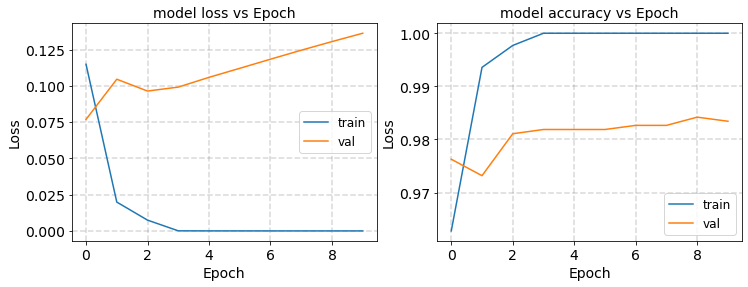

run 1


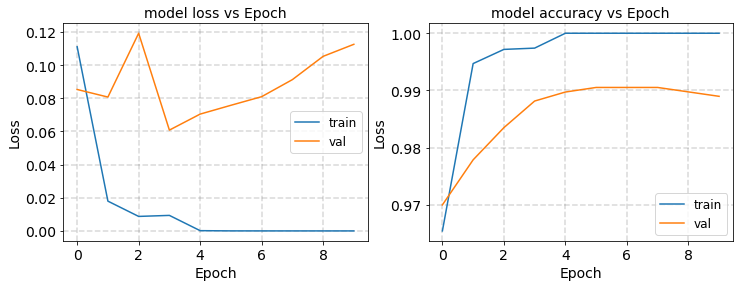

run 2


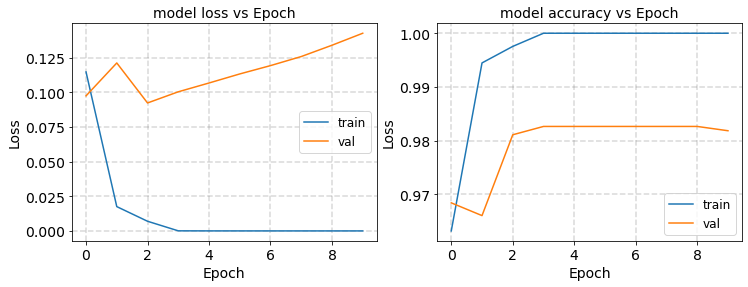

run 3


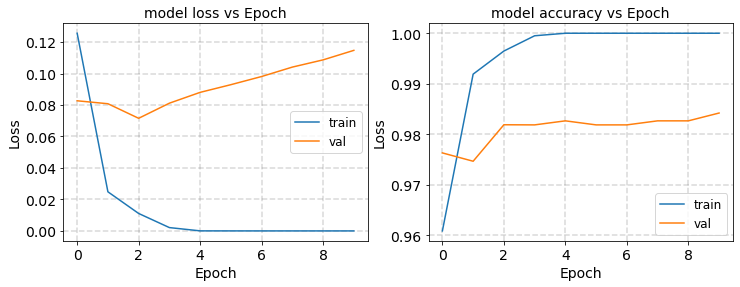

run 4


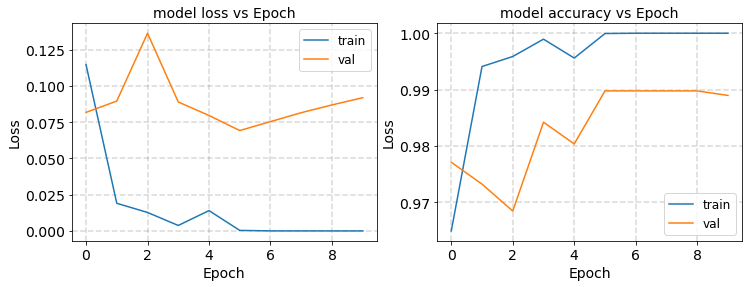

run 5


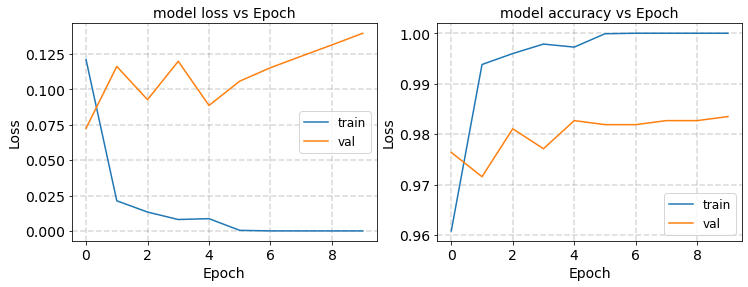

run 6


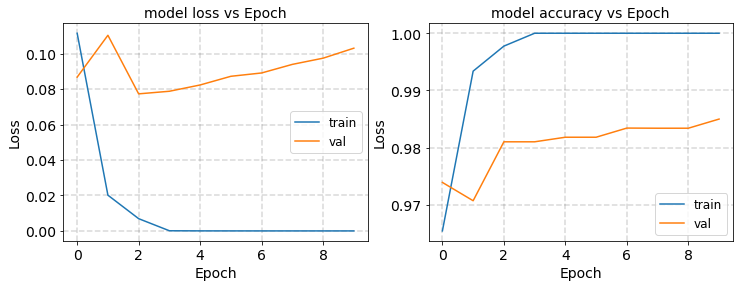

run 7


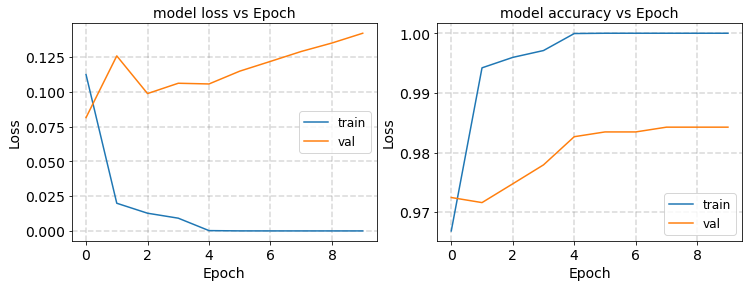

run 8


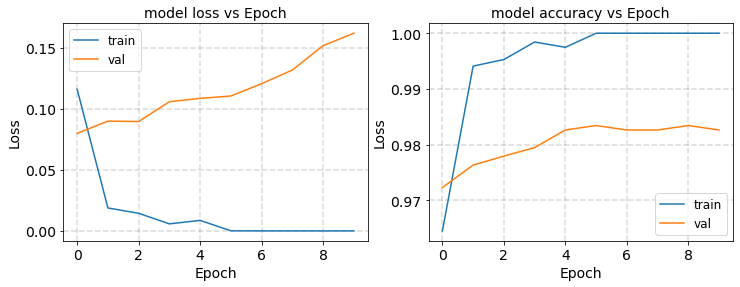

run 9


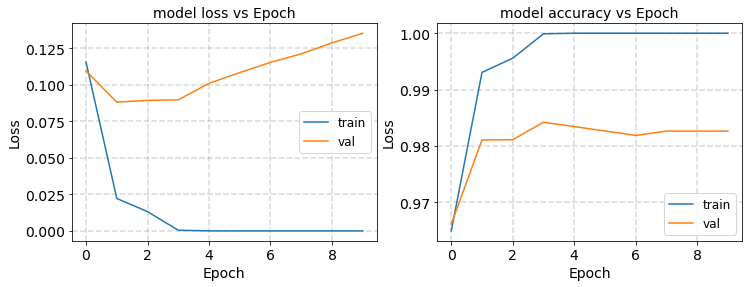

CPU times: user 10min 56s, sys: 59.1 s, total: 11min 55s
Wall time: 13min 38s


In [4]:
%%time
series = [2,3,8,9]
num_runs = 10
name = '2389_sim_prune_0_4_64_run'
for i in range(num_runs):
    print(f'run {i}')
    full_name = name + str(i)
    model, history = nc.make_train_simultaneous_model(x_train=x_train,
                                  y_train=y_train,
                                  x_test=x_test,
                                  y_test=y_test,
                                  series=series,
                                  num_hidden_layers=4,
                                  num_hidden_nodes=64,
                                  num_output_nodes=4,
                                  pruning=None,
                                  epochs=10,
                                  verbose=0,
                                  summary=False)
    
    exp_dict[full_name] = nc.get_n_cuts_and_p_value(
                        model = model,
                        model_history = history,
                        num_clusters=4,
                        random_state=None,
                        identity=False,
                        start=1,
                        num_shuffle_trials=20)


#### Convert Results to a dataframe

In [5]:
df = pd.DataFrame(exp_dict)
df = df.T
df_models = df.iloc[:, 0]
df.columns = ['model','N_cut','Mean_n_cut_rand', 'Std_n_cut_rand', 'Ste_n_cut_rand', 'Percentile','P_value', 'Significance','Direction', 'Accuracy']
df = df.drop('model', axis=1)
df

,N_cut,Mean_n_cut_rand,Std_n_cut_rand,Ste_n_cut_rand,Percentile,P_value,Significance,Direction,Accuracy
2389_sim_prune_0_4_64_run0,2.16985,2.15467,0.0177967,0.00397947,90,0.2,No,larger,0.983425
2389_sim_prune_0_4_64_run1,2.2493,2.22364,0.0379436,0.00848445,85,0.3,No,larger,0.988975
2389_sim_prune_0_4_64_run2,2.23226,2.17998,0.0290178,0.00648858,100,0,Yes,larger,0.98185
2389_sim_prune_0_4_64_run3,2.14999,2.17482,0.039965,0.00893644,35,0.7,No,smaller,0.9842
2389_sim_prune_0_4_64_run4,2.25557,2.17978,0.0279069,0.00624018,100,0,Yes,larger,0.988975
2389_sim_prune_0_4_64_run5,2.18235,2.18792,0.0199897,0.00446983,40,0.8,No,smaller,0.983475
2389_sim_prune_0_4_64_run6,2.17757,2.1305,0.0239648,0.00535869,95,0.1,No,larger,0.985
2389_sim_prune_0_4_64_run7,2.22389,2.18014,0.0291319,0.00651408,95,0.1,No,larger,0.98425
2389_sim_prune_0_4_64_run8,2.2247,2.18878,0.0239897,0.00536426,100,0,Yes,larger,0.982625
2389_sim_prune_0_4_64_run9,2.13221,2.16995,0.0270645,0.0060518,10,0.2,No,smaller,0.982625


#### Save dataframe

In [6]:
import pickle
with open('df_'+ name, 'wb') as fp:
    pickle.dump(df, fp)
    
with open('df_'+ name, 'rb') as fp:
    df = pickle.load(fp)
df

,N_cut,Mean_n_cut_rand,Std_n_cut_rand,Ste_n_cut_rand,Percentile,P_value,Significance,Direction,Accuracy
2389_sim_prune_0_4_64_run0,2.16985,2.15467,0.0177967,0.00397947,90,0.2,No,larger,0.983425
2389_sim_prune_0_4_64_run1,2.2493,2.22364,0.0379436,0.00848445,85,0.3,No,larger,0.988975
2389_sim_prune_0_4_64_run2,2.23226,2.17998,0.0290178,0.00648858,100,0,Yes,larger,0.98185
2389_sim_prune_0_4_64_run3,2.14999,2.17482,0.039965,0.00893644,35,0.7,No,smaller,0.9842
2389_sim_prune_0_4_64_run4,2.25557,2.17978,0.0279069,0.00624018,100,0,Yes,larger,0.988975
2389_sim_prune_0_4_64_run5,2.18235,2.18792,0.0199897,0.00446983,40,0.8,No,smaller,0.983475
2389_sim_prune_0_4_64_run6,2.17757,2.1305,0.0239648,0.00535869,95,0.1,No,larger,0.985
2389_sim_prune_0_4_64_run7,2.22389,2.18014,0.0291319,0.00651408,95,0.1,No,larger,0.98425
2389_sim_prune_0_4_64_run8,2.2247,2.18878,0.0239897,0.00536426,100,0,Yes,larger,0.982625
2389_sim_prune_0_4_64_run9,2.13221,2.16995,0.0270645,0.0060518,10,0.2,No,smaller,0.982625


In [7]:
df_models[0].layers[1].get_weights()[0]

array([[ 0.07389159, -0.03361991,  0.06289885, ...,  0.06078311,
         0.03766184,  0.06991845],
       [-0.00632658, -0.06744164, -0.02689353, ...,  0.03209767,
         0.04288898,  0.01149746],
       [ 0.03503221, -0.02670975, -0.07233632, ...,  0.02896393,
        -0.01445285,  0.01269231],
       ...,
       [ 0.06673632, -0.07574593,  0.0644393 , ..., -0.04541655,
        -0.06178824, -0.06932406],
       [ 0.0006596 , -0.0116853 ,  0.02468795, ..., -0.05615263,
        -0.05227249,  0.02178641],
       [ 0.03445463,  0.05856005, -0.01127285, ...,  0.01517759,
         0.06441776,  0.03273284]], dtype=float32)

#### Look at results of first experiment

In [8]:
for val in exp_dict[name + str(0)]:
    print(val)

2.1698464964412536
2.154671863605293
0.017796722462742047
0.003979468120338868
90.0
0.2
No
larger
0.9834250211715698
